# GRIP Task2:To Explore Supervised Machine Learning(Simple Linear Regression)

- By NARENDRA

## Problem
###  To predict the percentage scores of a student based on his/her hours of study

### IMPORTING THE REQUIRED PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Marks.csv")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Checking whether any values are missing

In [7]:

data.isnull().any() 

Hours     False
Scores    False
dtype: bool

In [8]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Plotting the data

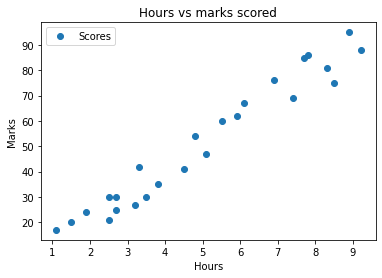

In [9]:
# plot the data
data.plot(x="Hours",y="Scores",style='o')

plt.title('Hours vs marks scored')
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

# observation from data
- There are no null values 
- No textual data
## From graph
- As number of study hours increases, Marks also increases
- we can use Linear Regression

## Preparing the data

- Converting the data Frame to numpy arrays

In [10]:
# such that x = input and y= output
x= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values  
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Split the data into train and test sets
-   use Scikit.learn's built-in train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
print("x shape=",x.shape)
print("y shape=",y.shape)
print("x train=",x_train.shape)
print("y train=",y_train.shape)
print("x test=",x_test.shape)
print("y test=",y_test.shape)

x shape= (25, 1)
y shape= (25,)
x train= (20, 1)
y train= (20,)
x test= (5, 1)
y test= (5,)


In [13]:
# now train your model using algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred=regressor.predict(x_test)

## visualising training dataset 

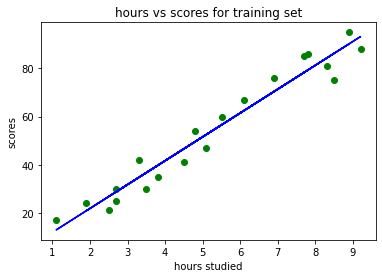

In [15]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("hours vs scores for training set")
plt.xlabel("hours studied")
plt.ylabel("scores")
plt.show()

## Visualizing test data set 

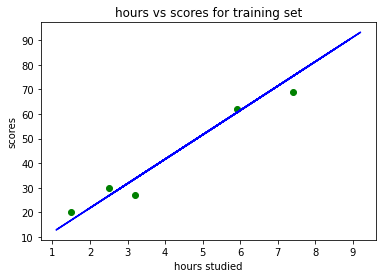

In [16]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title("hours vs scores for training set")
plt.xlabel("hours studied")
plt.ylabel("scores")
plt.show()

# Making predictions
- As we trained our algorithm,its time to make some predictions

In [17]:
# we can test with our own data
hours=[[9.258]] 
prediction=regressor.predict(hours)
print("Hours=",hours)
print("predicted score=",prediction)

Hours= [[9.258]]
predicted score= [93.77101774]


# Actual vs predicted

In [18]:
df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})  
df 

,Actual value,Predicted value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


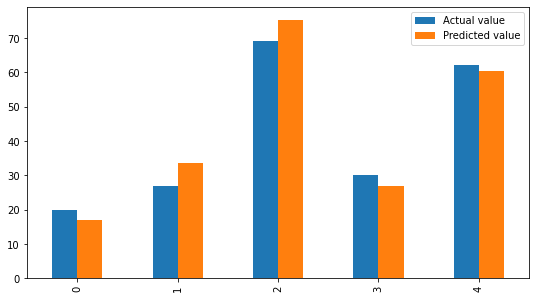

In [19]:
df.plot(kind='bar',figsize=(9,5))
plt.show()

# Plotting the Regressor line

In [20]:
print(regressor.intercept_)

2.0181600414346974


In [21]:
print(regressor.coef_)


[9.91065648]


In [25]:
line=regressor.coef_*x+regressor.intercept_
x1=regressor.coef_*9.25+regressor.intercept_ # hours for 9.25
x1

array([93.69173249])

# equation of linear regression model is
## scores=9.91065* hours studied+2.10816

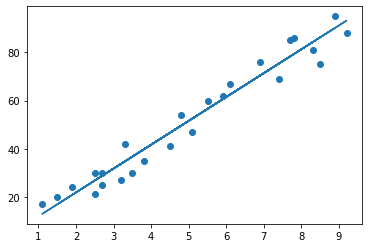

In [23]:
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

# Evaluating the model
- Evaluate the performance of algorithm
- It tells how well algorithm performed on particular dataset

In [24]:
# check the accuracy
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy
# if accuracy is close to 1 ,then model is good

0.9454906892105355

# Accuracy 
- accuracy is 94% ,then the model is good

 ## End